<a href="https://colab.research.google.com/github/nvinay1303/fred_economic_data_analysis/blob/main/Unemployment_Data_Analysis_FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [267]:
!pip install fredapi

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use("fivethirtyeight")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

In [269]:
from google.colab import userdata
fred_key = userdata.get('fred_api_key')

In [270]:
# Create the Fred Object

fred = Fred(api_key=fred_key)
fred

In [271]:
# Search for economic data

fred.search('S&P', order_by='popularity').head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-11-08,2024-11-08,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-11-07,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-08 08:26:20-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-11-08,2024-11-08,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-10-29 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-11-08,2024-11-08,S&P 500,2014-11-10,2024-11-07,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-11-07 19:11:42-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-11-08,2024-11-08,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-11-07,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-08 08:26:23-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2024-11-08,2024-11-08,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-11-07,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-08 08:33:02-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


# Pull raw data and plot

In [272]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500 Index'}>

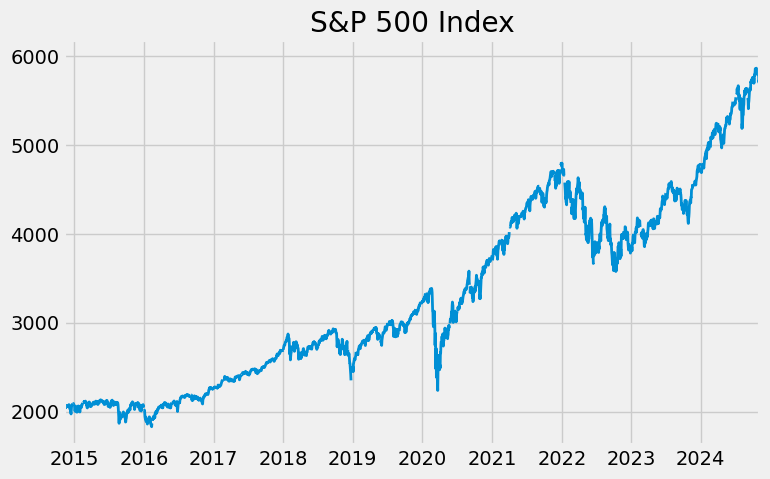

In [273]:
sp500.plot(figsize=(8,5), title="S&P 500 Index", lw=2)

# Pull and join and multiple data series

In [275]:
unemploy_results = fred.search('Unemployment', order_by="popularity")
unemploy_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2024-11-08,2024-11-08,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2024-09-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-10-10 07:42:03-05:00,95,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2024-11-08,2024-11-08,Unemployment Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:02-05:00,95,The unemployment rate represents the number of...
PAYEMS,PAYEMS,2024-11-08,2024-11-08,"All Employees, Total Nonfarm",1939-01-01,2024-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-11-01 07:48:01-05:00,83,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2024-11-08,2024-11-08,Initial Claims,1967-01-07,2024-11-02,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-11-07 07:33:01-06:00,81,An initial claim is a claim filed by an unempl...
SAHMREALTIME,SAHMREALTIME,2024-11-08,2024-11-08,Real-time Sahm Rule Recession Indicator,1959-12-01,2024-10-01,Monthly,M,Percentage Points,Percentage Points,Seasonally Adjusted,SA,2024-11-01 07:59:01-05:00,80,Sahm Recession Indicator signals the start of ...


In [276]:
unrate = fred.get_series(series_id='UNRATE')

In [277]:
unrate.head()

,0
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [278]:
unrate.shape

(922,)

<Axes: title={'center': 'Unemployment Rate'}>

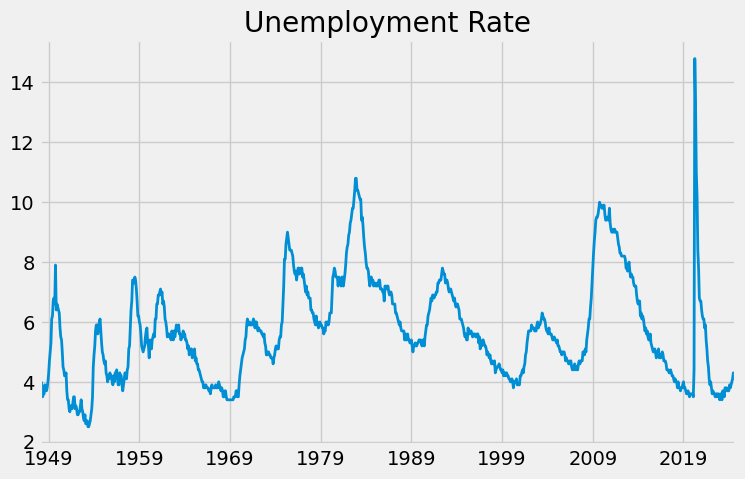

In [279]:
unrate.plot(figsize=(8,5), title="Unemployment Rate", lw=2)

In [280]:
unemploy_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemploy_df = unemploy_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemploy_df = unemploy_df.loc[unemploy_df['title'].str.contains('Unemployment Rate')]
unemploy_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-11-08,2024-11-08,Unemployment Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-11-08,2024-11-08,Unemployment Rate - Black or African American,1972-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:04-05:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-11-08,2024-11-08,Unemployment Rate in California,1976-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-23 21:54:02-05:00,64,None
TXUR,TXUR,2024-11-08,2024-11-08,Unemployment Rate in Texas,1976-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-10-23 21:54:03-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-11-08,2024-11-08,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000026,LNS14000026,2024-11-08,2024-11-08,"Unemployment Rate - 20 Yrs. & over, Women",1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:31-05:00,6,To obtain estimates of women worker employment...
LNS14000048,LNS14000048,2024-11-08,2024-11-08,Unemployment Rate - 25 Yrs. & over,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:31-05:00,6,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2024-11-08,2024-11-08,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:33-05:00,6,The series comes from the 'Current Population ...


In [281]:
unemploy_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

In [282]:
all_results = []
for myid in unemploy_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)


In [283]:
all_results[0].head()

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [286]:
unemploy_results = pd.concat(all_results, axis=1).filter(regex='UR$').drop(['CMWRUR','CSOUUR','CNERUR','CWSTUR',	'CNEWUR'],axis=1)
unemploy_results.head()

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,NDUR,MTUR,DCUR,MSUR,MEUR,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

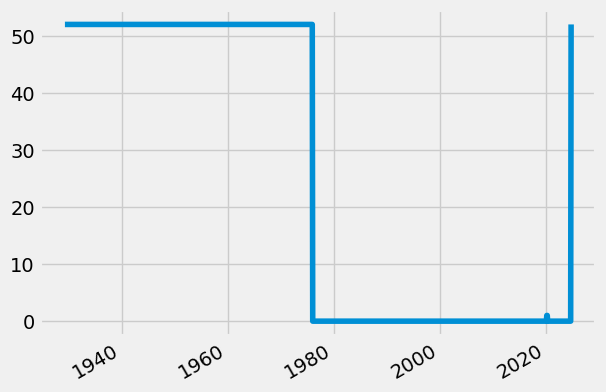

In [287]:
unemploy_results.isna().sum(axis=1).plot()

In [288]:
unemploy_states = unemploy_results.dropna()

In [289]:
id_to_state = unemploy_df.title.str.replace("Unemployment Rate in ", '').to_dict()
unemploy_states.columns = [id_to_state[i] for i in unemploy_states.columns]
px.line(unemploy_states, title="Unemployment Rate by State")

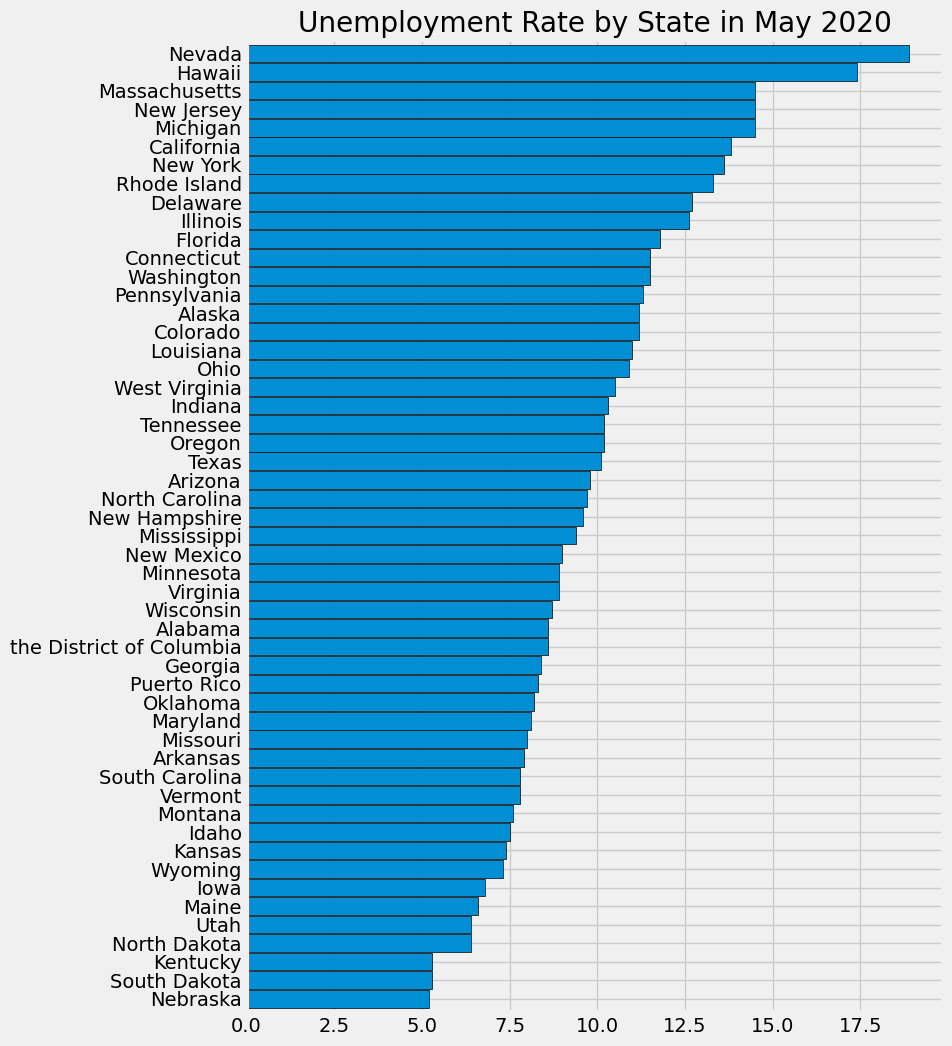

In [290]:
# Find the unemployment rate by state in April 2020
ax = unemploy_states[unemploy_states.index == '2020-06-01'].T \
    .sort_values(by='2020-06-01') \
    .plot(kind="barh", title="Unemployment Rate by State in May 2020", figsize=(8,12), width = 0.95, edgecolor='black')
ax.legend().remove()
plt.show()

# Pull participation rate

In [329]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = unemploy_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_id_to_state = part_df.title.str.replace("Labor Force Participation Rate for ", '').to_dict()

In [330]:
all_results = []
for myid in unemploy_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

part_states = pd.concat(all_results, axis=1)

In [331]:
part_states.columns = [part_id_to_state[i] for i in part_states.columns]

In [332]:
part_states = part_states.drop(columns=[col for col in part_states.columns if col.startswith("Labor") or col.startswith("Infra")])
part_states.head()

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,Pennsylvania,Massachusetts,Minnesota,Maryland,West Virginia,Tennessee,Maine,Illinois,North Carolina,Georgia,Louisiana,South Carolina,Colorado,Utah,Virginia,Indiana,Missouri,New Jersey,Iowa,Alaska,Washington,Arizona,New Mexico,Idaho,Arkansas,Oklahoma,Nebraska,Hawaii,Nevada,Montana,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,District Of Columbia,Delaware,Wyoming
1948-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
part_states = part_states.dropna()
part_states.shape

(585, 51)